In [12]:
import torch
import torch.nn as nn
import copy

import matplotlib.pyplot as plt
import numpy as np

In [13]:
model = nn.Sequential(
    nn.Linear(2, 8),
    nn.Linear(8, 8),
    nn.Linear(8, 1)
)




In [14]:
weights_noseed = []
weights_rs1a = []
weights_rs2 = []
weights_rs1b = []

model_noseed = copy.deepcopy(model)

for p in model_noseed.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

    
torch.manual_seed(17)
model_rs1a = copy.deepcopy(model)
for p in model_rs1a.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

torch.manual_seed(1000)
model_rs2 = copy.deepcopy(model)
for p in model_rs2.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

torch.manual_seed(17)
model_rs1b = copy.deepcopy(model)
for p in model_rs1b.named_parameters():
    if 'weight' in p[0]:
        nn.init.xavier_normal_(p[1].data)

In [15]:
for p in model_noseed.named_parameters():
    weights_noseed = np.concatenate((weights_noseed, p[1].data.numpy().flatten()), axis=0)
    
for p in model_rs1a.named_parameters():
    weights_rs1a = np.concatenate((weights_rs1a, p[1].data.numpy().flatten()), axis=0)
    
for p in model_rs2.named_parameters():
    weights_rs2 = np.concatenate((weights_rs2, p[1].data.numpy().flatten()), axis=0)
    
for p in model_rs1b.named_parameters():
    weights_rs1b = np.concatenate((weights_rs1b, p[1].data.numpy().flatten()), axis=0)

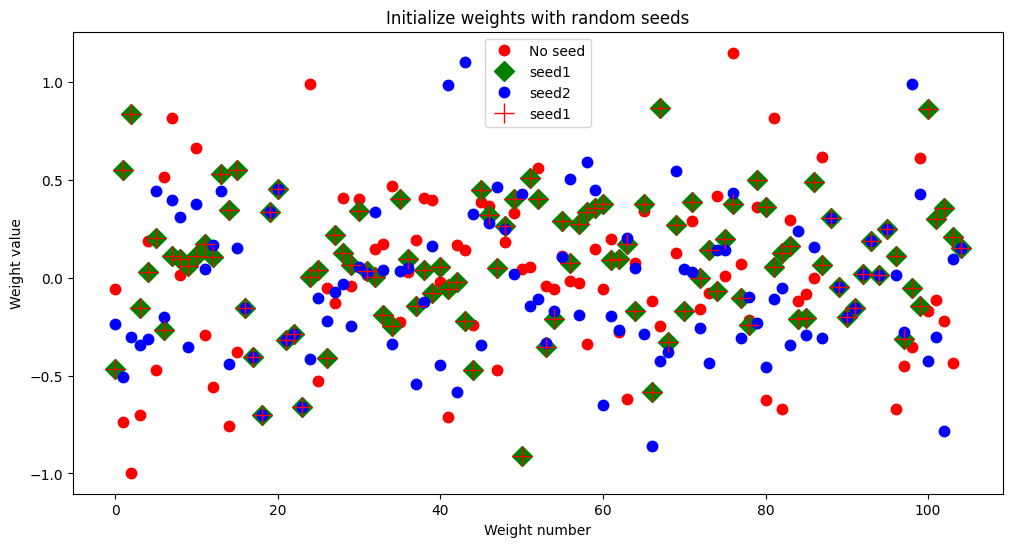

In [20]:
figure = plt.figure(figsize=(12,6))
plt.plot(weights_noseed, 'r.', markersize=15)
plt.plot(weights_rs1a, 'gD', markersize=10)
plt.plot(weights_rs2, 'b.', markersize=15)
plt.plot(weights_rs1b, 'r+', markersize=15)

plt.xlabel('Weight number')
plt.ylabel('Weight value')
plt.title('Initialize weights with random seeds')
plt.legend(['No seed', 'seed1', 'seed2', 'seed1'])

plt.show()